In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

from pyplr import graphing, utils, preproc
from pyplr.plr import PLR

# Columns to load
use_cols = ['confidence',
            'method',
            'pupil_timestamp',
            'eye_id',
            'diameter_3d',
            'diameter']

# Some useful constants
SAMPLE_RATE = 120
DURATION = 1200
ONSET_IDX = 240

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 16399 samples
Loaded 6 events
Extracted ranges for 6 events


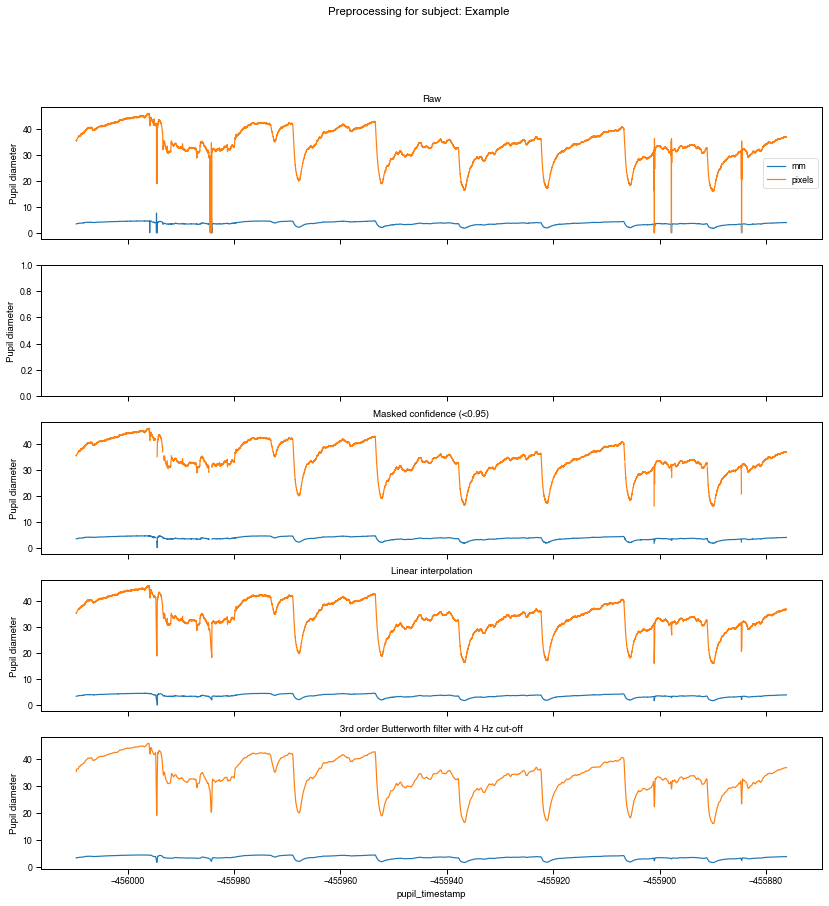

In [14]:
datdir = '/Users/jtm/OneDrive - Nexus365/data/000'
# Get a handle on a subject
s = utils.new_subject(
    datdir, export='000', out_dir_nm='pyplr_analysis')

# Load pupil data
samples = utils.load_pupil(
    s['data_dir'], eye_id='best', method='3d', cols=use_cols)

# Pupil columns to analyse
pupil_cols = ['diameter_3d', 'diameter']

# Make figure for processing
f, axs = graphing.pupil_preprocessing(nrows=5, subject='Example')

# Plot the raw data
samples[pupil_cols].plot(title='Raw', ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['mm', 'pixels'])

# Mask first derivative
#samples = preproc.mask_pupil_first_derivative(
#    samples, threshold=4.0, mask_cols=pupil_cols)
#samples[pupil_cols].plot(
#    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples = preproc.mask_pupil_confidence(
    samples, threshold=0.95, mask_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Masked confidence (<0.95)', ax=axs[2], legend=False)

# Interpolate
samples = preproc.interpolate_pupil(
    samples, interp_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth  
samples = preproc.butterworth_series(
    samples, fields=pupil_cols, filt_order=3, 
    cutoff_freq=4/(SAMPLE_RATE/2))
samples[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off', 
    ax=axs[4], legend=False)

# Load events
events = utils.load_annotations(s['data_dir'])

# Extract the event ranges
ranges = utils.extract(
    samples, 
    events, 
    offset=-ONSET_IDX, 
    duration=DURATION, 
    borrow_attributes=['color'])

# Calculate baselines
baselines = ranges.loc[:, range(0, ONSET_IDX), :].mean(level=0)

# New columns for percent signal change
ranges = preproc.percent_signal_change(
    ranges, baselines, pupil_cols)

# Convert samples index-level to time (s)
new_onset = (ranges.index.get_level_values('onset').unique() - ONSET_IDX) / SAMPLE_RATE
ranges.index = ranges.index.set_levels(levels=new_onset, level='onset')

<AxesSubplot:xlabel='onset'>

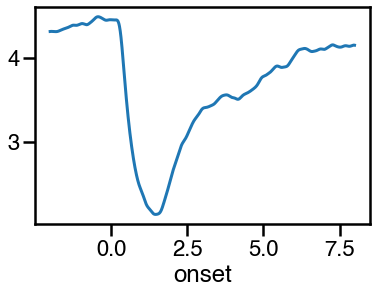

In [19]:
ranges.loc[0, 'diameter_3d'].plot()

In [28]:
plr = PLR(ranges.loc[:, 'diameter_3d'].mean(level=1).to_numpy(), sample_rate=SAMPLE_RATE, onset_idx=240, stim_duration=1)

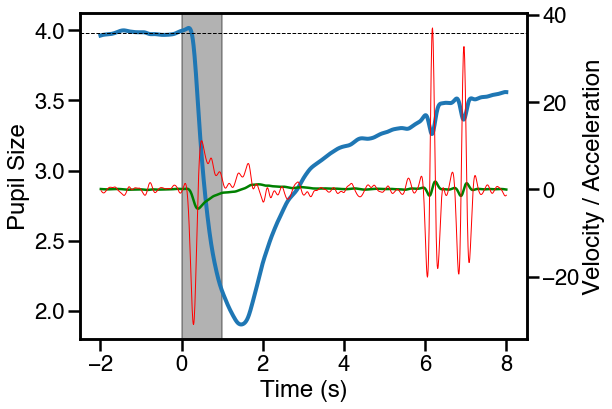

In [29]:
f = plr.plot(print_params=False)

In [30]:
plr.velocity_profile()

array([        nan,  0.09558421,  0.09308123, ...,  0.0003867 ,
       -0.01134065, -0.022338  ])

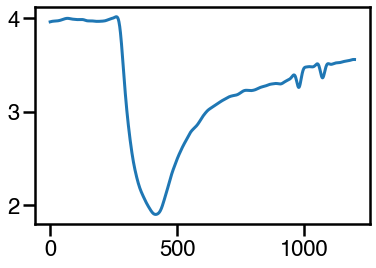

In [33]:
ax = plt.plot(plr.plr)

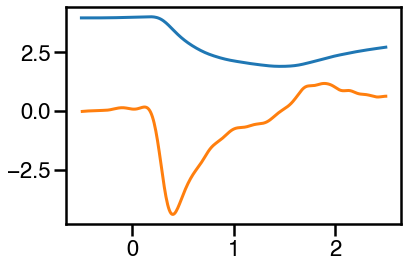

In [62]:
plr = ranges.loc[(slice(None), slice(-.5,2.5)), 'diameter_3d'].mean(level=1)
t = plr.index
f, ax = plt.subplots()
ax.plot(t, plr)
ax.plot(t, va.velocity_profile())

In [85]:
va = PLR(ranges.loc[(slice(None), slice(-.5,3.)), 'diameter_3d'].mean(level=1).to_numpy(), sample_rate=SAMPLE_RATE, onset_idx=60, stim_duration=1)

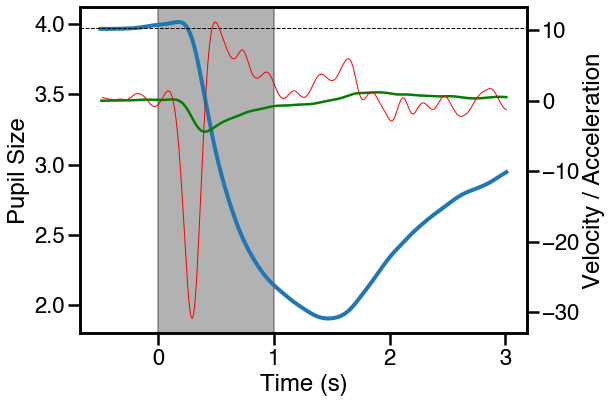

In [86]:
f = va.plot(print_params=False)

In [87]:
f.set_figwidth(4)
f.set_figheight(4)

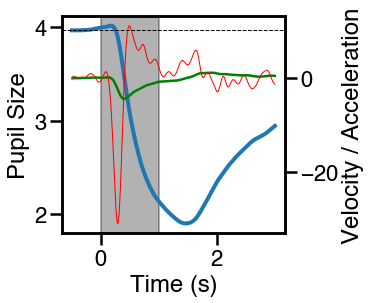

In [88]:
f

In [90]:
f.savefig('../img/PLR_trace.tiff', dpi=300, bbox_inches='tight')

In [84]:
va.parameters()

,value
Baseline,3.974931
Latency_a,0.266667
Latency_b,0.291667
T2MaxVel,0.400000
T2MaxCon,1.466667
T2Rec75pc,4.858333
PeakCon,1.903160
ConAmplitude,2.071771
VelConMax,4.403478
VelConAve,1.714989


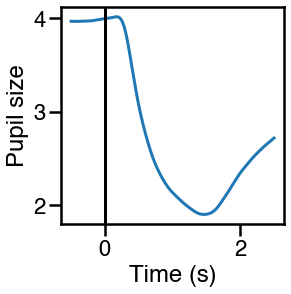

In [123]:
f, ax = plt.subplots()
ax.plot(t, plr)
ax.axvline(0, 0, 1, c='k')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pupil size')
f.set_figwidth(4)
f.set_figheight(4)
f.savefig('../img/simple_PLR.tiff', dpi=300, bbox_inches='tight')

In [116]:
f = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [119]:
f.savefig('../img/simple_PLR.tiff', dpi=300, bbox_inches='tight')

In [120]:
f

<Figure size 288x288 with 0 Axes>